In this post, we'll produce an animation of the k-means algorithm. The k-means algorithm is a very useful clustering tool. It allows you to cluster your data into a given number of categories.

The algorithm, as described in [Andrew Ng's Machine Learning class over at Coursera](https://www.coursera.org/learn/machine-learning/lecture/93VPG/k-means-algorithm) works as follows:

- initialize $k$ cluster centroids
- repeat the following:
    - for each point, compute which centroid is nearest to it
    - for each centroid, move its location to the mean location of the points assigned to it

To implement the algorithm, we will start by defining a dataset to work with and plot it. In this post, we will only use pure numpy based functions and datatypes.

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [112]:
points = np.random.randn(200, 2)

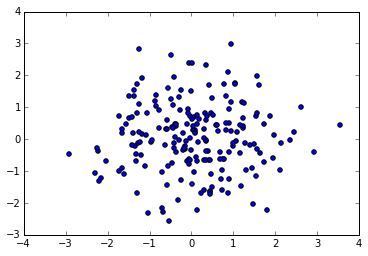

In [113]:
plt.scatter(points[:, 0], points[:, 1])

We now write a function that initializes k centroids by randomly selecting them from the data points.

In [114]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

Let's try the function:

In [116]:
initialize_centroids(points, 3)

array([[-0.08116906,  0.83233366],
       [ 0.0560566 , -1.04174117],
       [ 1.94525955, -0.5873133 ]])

Let's check the results with a plot:

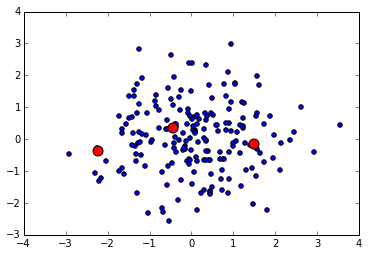

In [117]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

Now let's define a function that returns the closest centroid for each point. We will use numpy broadcasting to do this.

In [118]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [119]:
c = initialize_centroids(points, 3)

In [120]:
closest_centroid(points, c)

array([1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0,
       1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2], dtype=int64)

Why does this function work? It makes use of what I would call some advanced numpy broadcasting tricks. To investigate this into more detail, let's look at some steps in the computing process. First, our variable `c` denotes our centroids that we want to work with. Let's look at their coordinates:

In [121]:
c

array([[ 0.3090238 , -1.58415285],
       [-1.31097826,  0.80542897],
       [ 0.32411334,  0.80483439]])

One of the interesting things with numpy is that we can extend an array by a new dimension using the `np.newaxis` command like this:

In [122]:
c_extended = c[: , np.newaxis, :]
c_extended

array([[[ 0.3090238 , -1.58415285]],

       [[-1.31097826,  0.80542897]],

       [[ 0.32411334,  0.80483439]]])

Our array, which had a shape of 3x2 becomes an array of shape:

In [123]:
c_extended.shape

(3L, 1L, 2L)

We've just added a dimension in the middle of the array. This allows us to substract this array from an existing point `p`, due to the fact that numpy applies broadcasting rules to array of non-matching sizes which allow for efficient operations (this is described in detail in the broadcasting section of the following document: [http://nbviewer.ipython.org/url/www.astro.washington.edu/users/vanderplas/Astr599_2014/notebooks/11_EfficientNumpy.ipynb](http://nbviewer.ipython.org/url/www.astro.washington.edu/users/vanderplas/Astr599_2014/notebooks/11_EfficientNumpy.ipynb)).

In particular, the rule used here for non-matching dimensions is:

> If the two arrays differ in their number of dimensions, the shape of the array with fewer dimensions is padded with ones on its leading (left) side.

In [124]:
p = points[0]
p

array([-1.6099582 , -1.09752068])

In [125]:
p - c_extended

array([[[-1.918982  ,  0.48663217]],

       [[-0.29897995, -1.90294965]],

       [[-1.93407154, -1.90235507]]])

In [126]:
(p - c_extended).shape

(3L, 1L, 2L)

The broadcasting allows us to keep the first dimension as the point dimension, which allows us to generalize the trick for more than one point:

In [128]:
points[:4] - c_extended

array([[[-1.918982  ,  0.48663217],
        [-0.8634157 ,  0.74591997],
        [-2.35020211,  0.88584062],
        [-1.78943298,  2.23996214]],

       [[-0.29897995, -1.90294965],
        [ 0.75658636, -1.64366185],
        [-0.73020005, -1.5037412 ],
        [-0.16943092, -0.14961968]],

       [[-1.93407154, -1.90235507],
        [-0.87850524, -1.64306727],
        [-2.36529165, -1.50314662],
        [-1.80452252, -0.1490251 ]]])

This then allows us to apply square root, square and sum operations that efficiently reduce the number of dimensions of the matrix:

In [129]:
np.sqrt(((points[:4] - c_extended)**2).sum(axis=2))

array([[ 1.97972291,  1.141001  ,  2.51160577,  2.86696717],
       [ 1.92629343,  1.80943283,  1.67165478,  0.22603736],
       [ 2.71285598,  1.86318048,  2.80250858,  1.81066562]])

Finally, we can obtain the index of the closest centroid using the `np.argmin` function:

In [130]:
np.argmin(np.sqrt(((points[:4] - c_extended)**2).sum(axis=2)), axis=0)

array([1, 0, 1, 1], dtype=int64)

The last step in the algorithm is to move the centroids to the mean location associated with it:

In [131]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [132]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 0.43677407, -1.15378112],
       [-1.35639802,  0.29035973],
       [ 0.55457844,  0.63096703]])

We can visualize these first two steps in the following way:

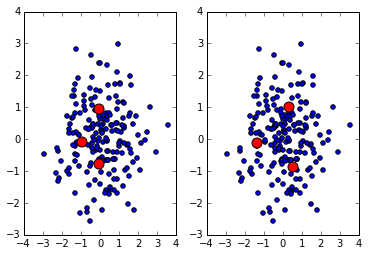

In [133]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

We can animate this type of plot using a module called JSAnimation:


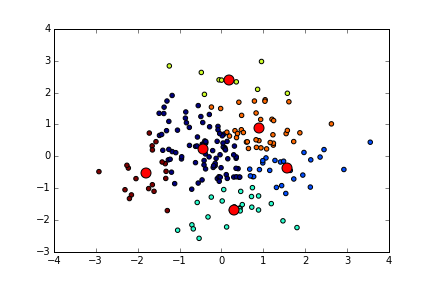
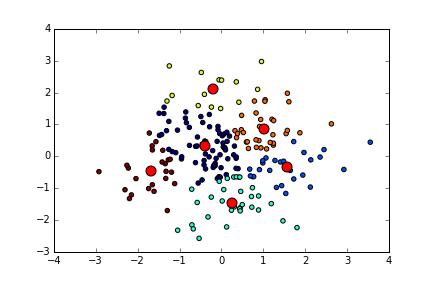
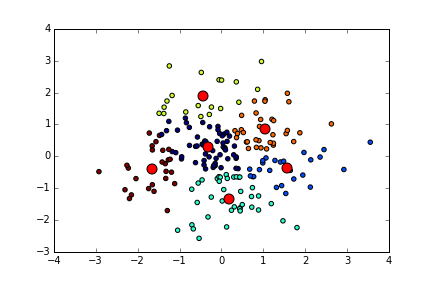
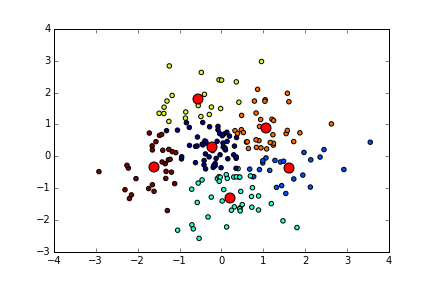
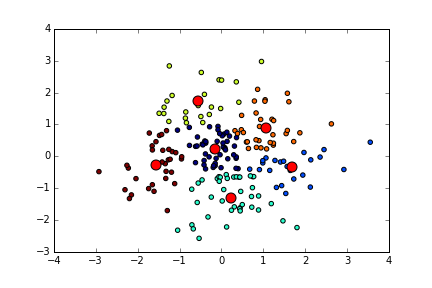
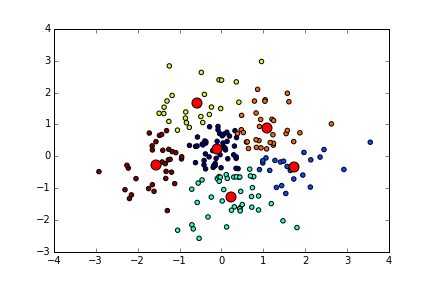
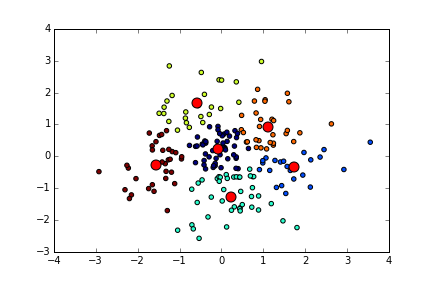
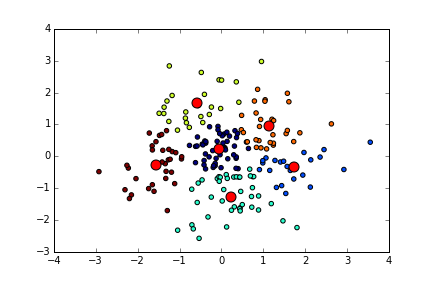
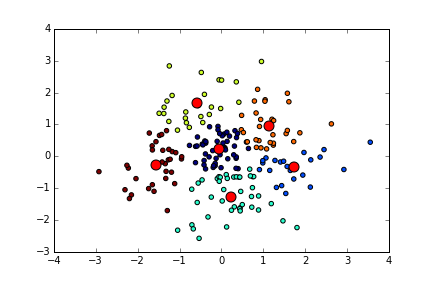
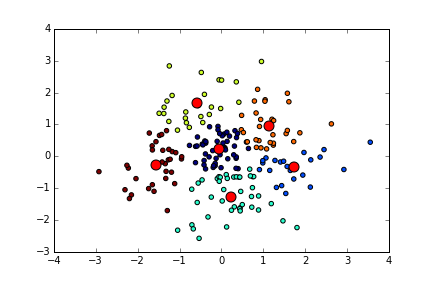

In [134]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 6)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)

The previous animation shows how the points in the dataset are changing their assigned centroid and how the centroid itself moves.

So that's it for today. I hope you have enjoyed this little notebook that demosntrated how to implement the k-means algorithm and animate it in the browser.

This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20150717_Kmeans.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20150717_Kmeans.ipynb).